## Importing libraries and the dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [8]:
# View the content of the directory
!dir

 Volume in drive C is OS
 Volume Serial Number is ACED-8F5A

 Directory of C:\Users\T.Arcky\Documents\Python Scripts\Loan Prediction

08/07/2017  03:30 PM    <DIR>          .
08/07/2017  03:30 PM    <DIR>          ..
08/07/2017  03:28 PM    <DIR>          .ipynb_checkpoints
08/07/2017  03:30 PM             1,055 Practice data set - Loan Prediction Problem.ipynb
08/07/2017  03:24 PM                21 Sample_Submission_ZAuTl8O_FK3zQHh.csv
08/07/2017  03:23 PM            21,957 test_Y3wMUE5_7gLdaTN.csv
08/07/2017  03:23 PM            38,013 train_u6lujuX_CVtuZ9i.csv
               4 File(s)         61,046 bytes
               3 Dir(s)  203,955,621,888 bytes free


In [12]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

## Quick data exploration

In [32]:
list(df)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


*CoapplicantIncome : no missing value
*Loan amount: 22 missing value
*Loan amount term: 14 missing value
*Credit history: 50 missing value

In [21]:
# Frequency distribution for non-numerical values
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Distribution analysis

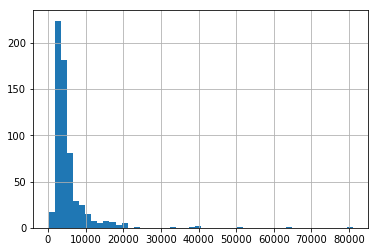

In [38]:
df['ApplicantIncome'].hist(bins=50)

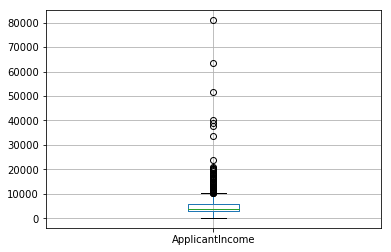

In [39]:
df.boxplot(column='ApplicantIncome')

In [ ]:
## Categorical variable analysis

## Categorical Variable Analysis

In [49]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


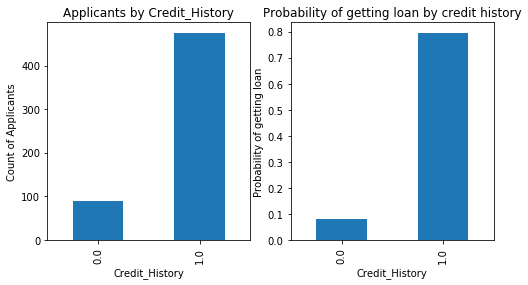

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

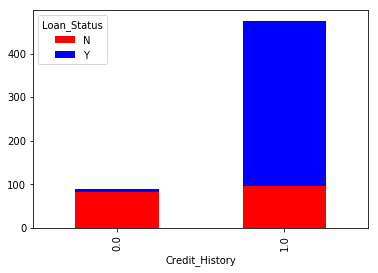

In [54]:
# Ploting the same graph using stacked chart
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Data munging in python: using Pandas

## Check missing values in the dataset

In [56]:
# Checking missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

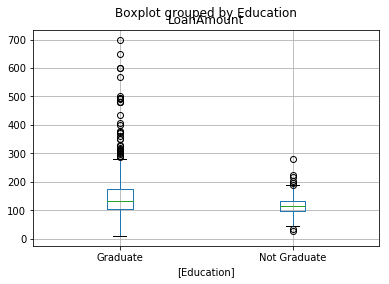

In [66]:
# Missing values in LoanAmount
data.boxplot(column="LoanAmount",by=["Education"])

In [68]:
# Examine self employed pivot
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [70]:
# Impute Self_Employed
df['Self_Employed'].fillna('No',inplace=True)

In [75]:
# Impute LoanAmount
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

In [95]:
# Checking missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [82]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [85]:
# Impute Gender
df['Gender'].fillna('No',inplace=True)

In [87]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [91]:
# Impute Married
df['Married'].fillna('Yes',inplace=True)

In [93]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [96]:
# Impute Dependents
df['Dependents'].fillna('0',inplace=True)

In [ ]:
df['Dependents'].value_counts()

## How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

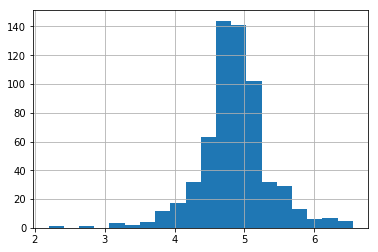

In [77]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

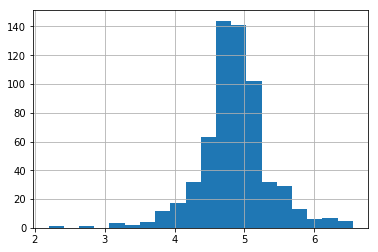

In [79]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

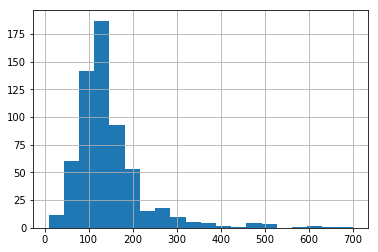

In [97]:
df['LoanAmount'].hist(bins=20)